In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
###  Load the dataset
company = pd.read_csv('data.csv')
company.head()

,Rank,Title,Employees,Sector,Industry,Hqlocation,Hqcity,Hqtel,Ceo,Revenues,Profits,Assets,Totshequity
0,1,Walmart,2300000,Retailing,General Merchandisers,"Bentonville, AR",Bentonville,479-273-4000,C. Douglas McMillon,485873,13643.0,198825,77798.0
1,2,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",Omaha,402-346-1400,Warren E. Buffett,223604,24074.0,620854,283001.0
2,3,Apple,116000,Technology,"Computers, Office Equipment","Cupertino, CA",Cupertino,408-996-1010,Timothy D. Cook,215639,45687.0,321686,128249.0
3,4,Exxon Mobil,72700,Energy,Petroleum Refining,"Irving, TX",Irving,972-444-1000,Darren W. Woods,205004,7840.0,330314,167325.0
4,5,McKesson,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",San Francisco,415-983-8300,John H. Hammergren,192487,2258.0,56563,8924.0


In [51]:
# Number of unique records
company.shape

(500, 13)

In [52]:
# Calculate the Total Number of Companies in the Dataset
num_companies = data_cleaned['Title'].nunique()
print(f'Total Number of Unique Companies: {num_companies}')

Total Number of Unique Companies: 500


In [53]:
#  Remove the duplicates values
df = company.drop_duplicates(subset=['Title', 'Revenues', 'Employees', 'Profits', 'Assets'])
df.shape[0]

500

####  1. Analyze top 10 companies highest annual revenue.

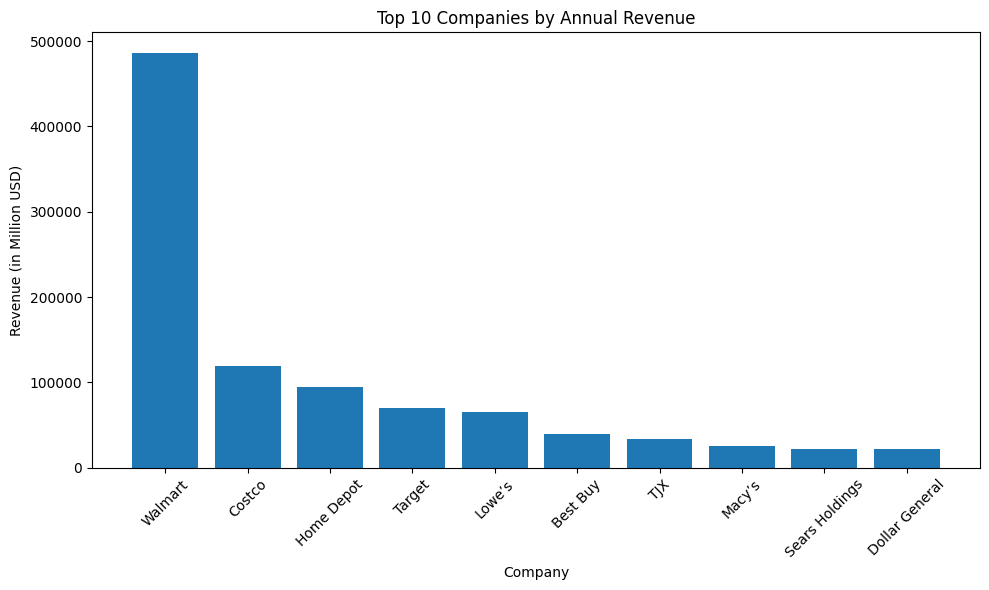

In [111]:
#  top 10 company revenue
top_10_revenue = df[['Title','Revenues']].sort_values(by='Revenues', ascending=False).head(10)

# Graph Plot
plt.figure(figsize=(10,6))
plt.title('Top 10 Companies by Annual Revenue')
plt.bar(top_10_revenue['Title'], top_10_revenue['Revenues'])
plt.xlabel('Company')  # x-axis title
plt.ylabel('Revenue (in Million USD)')  # y-axis title
plt.xticks(rotation=45)
plt.tight_layout()


####  2. Analyze which company has the highest number of employees

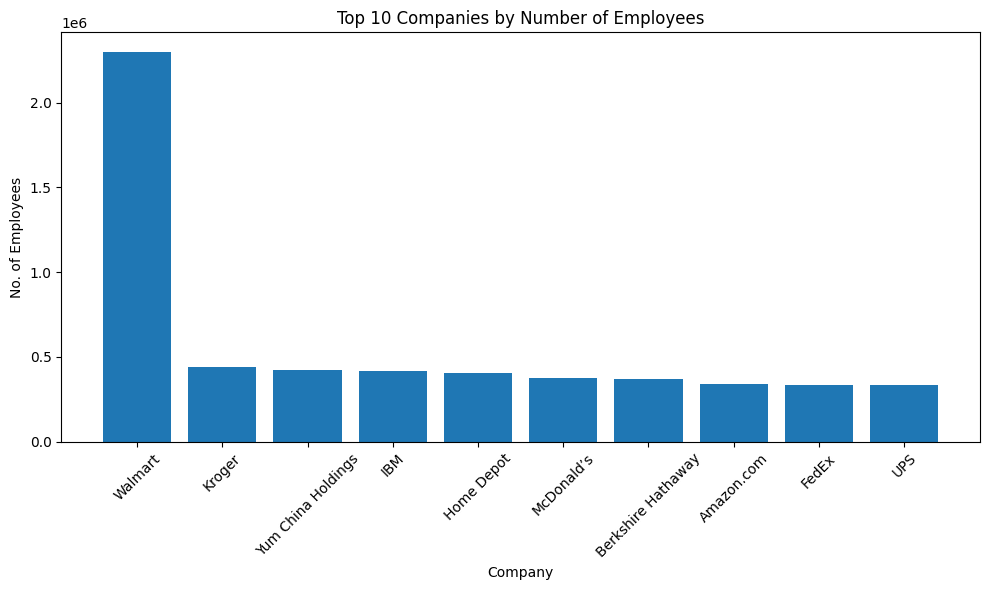

In [113]:
#  Company with the highest number of employees
top_employee = data_cleaned[['Title', 'Employees']].sort_values(by='Employees', ascending=False).head(10)

#  Graph plot
plt.figure(figsize = (10,6))
plt.bar(top_employee['Title'], top_employee['Employees'])
plt.title("Top 10 Companies by Number of Employees")

plt.xlabel('Company')
plt.ylabel('No. of Employees')
plt.xticks(rotation=45)
plt.tight_layout()


####   3.    Analyze Market Capitalization 

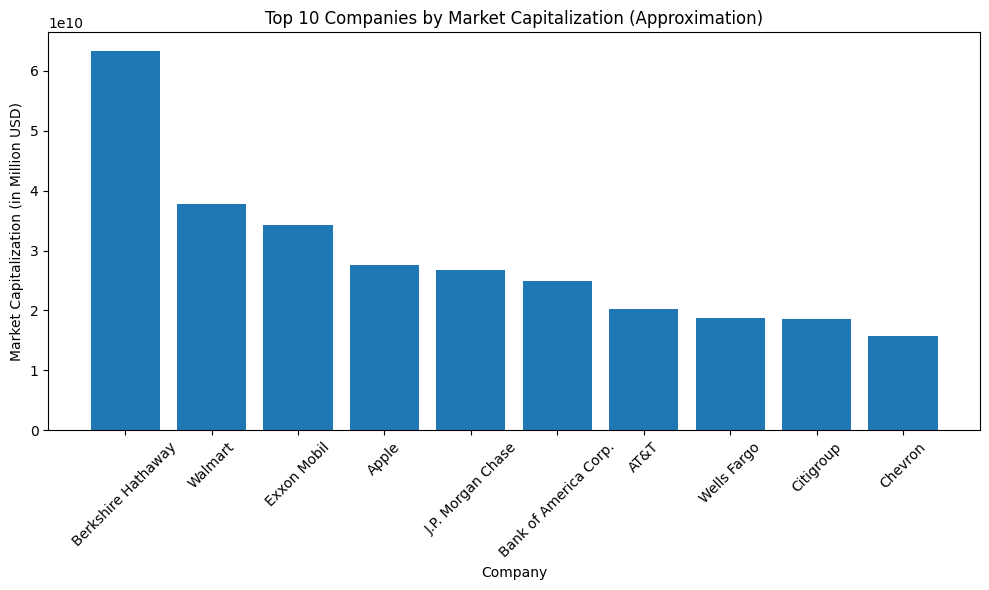

In [56]:
# Calculate Market Capitalization 
data_cleaned['MarketCap_approx'] = data_cleaned['Revenues'] * data_cleaned['Totshequity']

# top 10 MarketCap
top_market_cap = data_cleaned[['Title', 'MarketCap_approx']].sort_values(by='MarketCap_approx', ascending=False).head(10)

# Graph plot
plt.figure(figsize=(10,6))
plt.bar(top_market_cap['Title'],top_market_cap['MarketCap_approx'])
plt.title('Top 10 Companies by Market Capitalization (Approximation)')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (in Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()

####    4. Analyze Company Profits

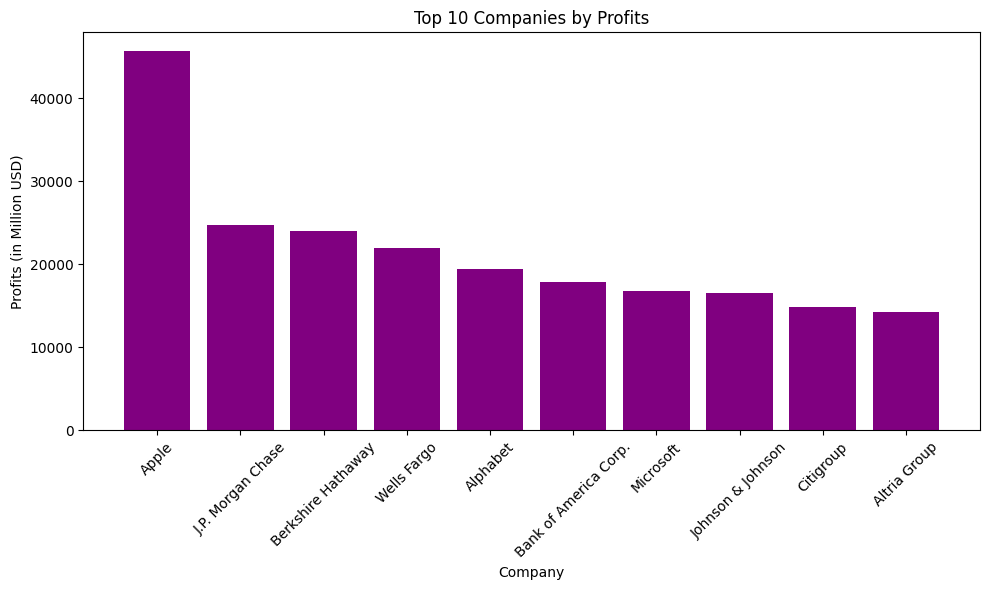

In [57]:
# Top 10 companies by profits
top_profits = data_cleaned[['Title', 'Profits']].sort_values(by='Profits', ascending=False).head(10)

# Graph plot
plt.figure(figsize=(10, 6))
plt.bar(top_profits['Title'], top_profits['Profits'], color='purple')
plt.title('Top 10 Companies by Profits')
plt.xlabel('Company')
plt.ylabel('Profits (in Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()

####  5. Analyze Company Assets

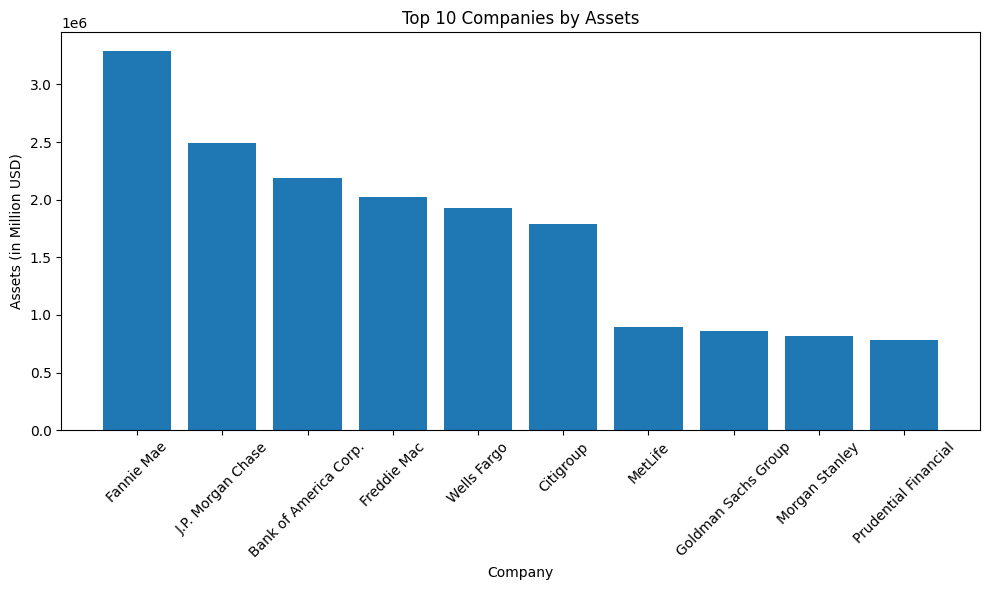

In [58]:
# Top 10 companies by assets
top_assets = data_cleaned[['Title', 'Assets']].sort_values(by='Assets', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_assets['Title'], top_assets['Assets'])
plt.title('Top 10 Companies by Assets')
plt.xlabel('Company')
plt.ylabel('Assets (in Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()

In [61]:
average_revenue = company['Revenues'].mean()
print(f'Average Company Revenue: {average_revenue} Million USD')


Average Company Revenue: 24111.748 Million USD


####  6. Analyse Number of companies in each sector

In [102]:
sectors = company.groupby('Sector')
# Display the number of sectors in the dataset
len(sectors) 
# Number of companies in each sector
sectors.size().sort_values(ascending=False) 

Sector
Financials                       84
Energy                           57
Retailing                        47
Technology                       43
Health Care                      38
Wholesalers                      29
Food, Beverages & Tobacco        24
Business Services                20
Materials                        19
Industrials                      19
Transportation                   17
Chemicals                        14
Engineering & Construction       13
Household Products               12
Aerospace & Defense              12
Media                            11
Telecommunications               10
Hotels, Restaurants & Leisure    10
Motor Vehicles & Parts            9
Food & Drug Stores                7
Apparel                           5
dtype: int64

In [109]:
####  Display the sectors sorted by average revenue
sectors['Revenues'].mean().sort_values(ascending=False)

Sector
Food & Drug Stores               55669.428571
Telecommunications               45997.800000
Motor Vehicles & Parts           43607.333333
Health Care                      34694.447368
Retailing                        29431.510638
Technology                       29246.255814
Aerospace & Defense              28191.833333
Wholesalers                      27566.068966
Financials                       24614.369048
Industrials                      22018.894737
Transportation                   20866.647059
Energy                           20638.894737
Food, Beverages & Tobacco        19700.250000
Media                            16433.363636
Household Products               15070.500000
Chemicals                        13476.214286
Apparel                          13250.800000
Hotels, Restaurants & Leisure    12118.900000
Business Services                 9734.250000
Engineering & Construction        9590.923077
Materials                         8934.473684
Name: Revenues, dtype: floa

####  7. Analyse the top 10 companies within a specific sector

In [101]:
# To display the top 10 companies within a specific sector
df = sectors.get_group('Retailing').head(10)
print("Top 10 companies in Retailing Sectors by revenue:")
print(df[['Title', 'Sector','Ceo','Profits', 'Revenues']])

Top 10 companies in Retailing Sectors by revenue:
              Title     Sector                  Ceo  Profits  Revenues
0           Walmart  Retailing  C. Douglas McMillon  13643.0    485873
15           Costco  Retailing     W. Craig Jelinek   2350.0    118719
22       Home Depot  Retailing      Craig A. Menear   7957.0     94595
37           Target  Retailing     Brian C. Cornell   2737.0     69495
39           Lowe’s  Retailing    Robert A. Niblock   3093.0     65017
71         Best Buy  Retailing       Hubert B. Joly   1228.0     39403
86              TJX  Retailing     Ernie L. Herrman   2298.2     33184
109          Macy’s  Retailing     Jeffrey Gennette    619.0     25778
126  Sears Holdings  Retailing    Edward S. Lampert  -2221.0     22138
127  Dollar General  Retailing        Todd J. Vasos   1251.1     21987


####   8. Analyse the company with the highest revenue in each sector

In [80]:
# Find the company with the highest revenue in each sector
max_revenue_per_sector = sectors.apply(lambda x: x.loc[x['Revenues'].idxmax()], include_groups=False)
max_revenue_per_sector = max_revenue_per_sector.reset_index()

# Display the company with the highest revenue in each sector
print("Company with the highest revenue in each sector:")
print(max_revenue_per_sector[['Title', 'Sector', 'Revenues']])  


Company with the highest revenue in each sector:
                       Title                         Sector  Revenues
0                     Boeing            Aerospace & Defense     94571
1                       Nike                        Apparel     32376
2              ManpowerGroup              Business Services     19654
3               Dow Chemical                      Chemicals     48158
4                Exxon Mobil                         Energy    205004
5                      Fluor     Engineering & Construction     19037
6         Berkshire Hathaway                     Financials    223604
7   Walgreens Boots Alliance             Food & Drug Stores    117351
8                    PepsiCo      Food, Beverages & Tobacco     62799
9         UnitedHealth Group                    Health Care    184840
10                McDonald’s  Hotels, Restaurants & Leisure     24622
11          Procter & Gamble             Household Products     71726
12          General Electric             

####  9. Analyse Companies with Lowest Profits

Number of Companies with Losses: 63


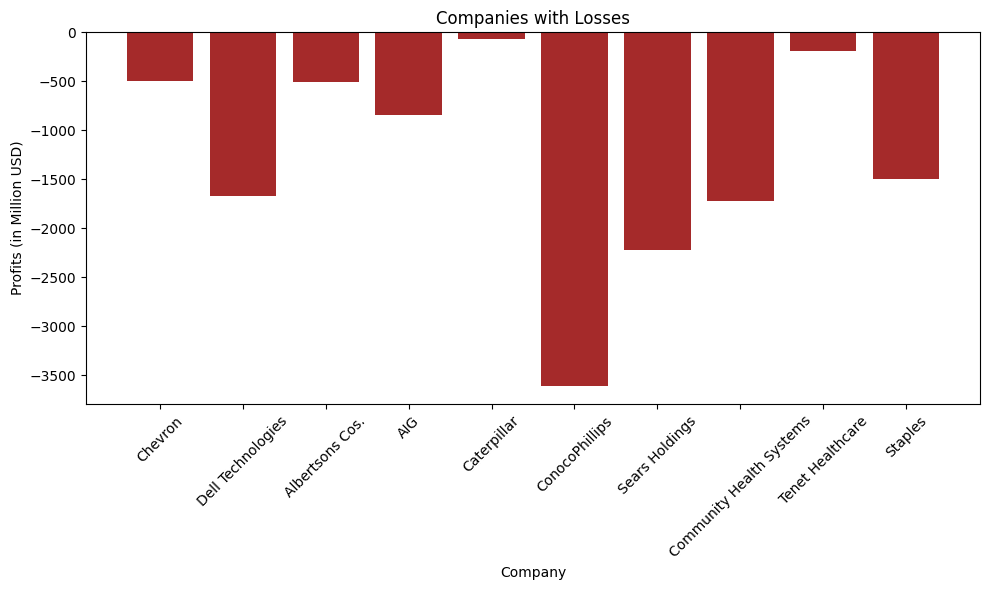

In [110]:
# Companies with negative profits
loss_making_companies = data_cleaned[data_cleaned['Profits'] < 0]
print(f'Number of Companies with Losses: {loss_making_companies.shape[0]}')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(loss_making_companies['Title'].head(10), loss_making_companies['Profits'].head(10), color='brown')
plt.title('Companies with Losses')
plt.xlabel('Company')
plt.ylabel('Profits (in Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()

####   10. Calculate Revenue Per Employee for Each Company

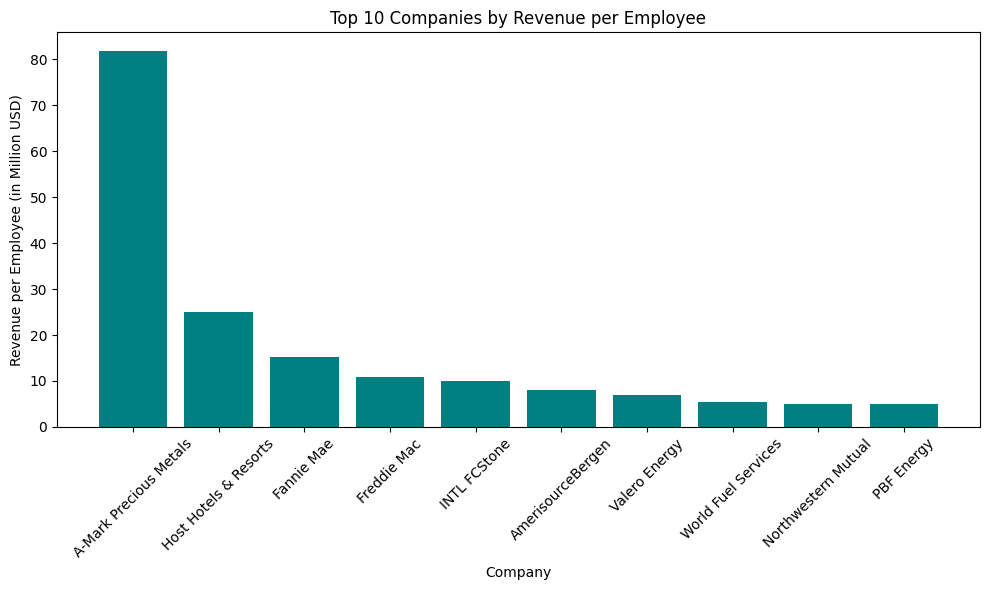

In [108]:
# Revenue per employee
data_cleaned['Revenue_per_Employee'] = data_cleaned['Revenues'] / data_cleaned['Employees']

# Top 10 companies with highest revenue per employee
top_revenue_per_employee = data_cleaned[['Title', 'Revenue_per_Employee']].sort_values(by='Revenue_per_Employee', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_revenue_per_employee['Title'], top_revenue_per_employee['Revenue_per_Employee'], color='teal')
plt.title('Top 10 Companies by Revenue per Employee')
plt.xlabel('Company')
plt.ylabel('Revenue per Employee (in Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()